In [4]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [6]:
print(tf.__version__)

NameError: name 'tf' is not defined

In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

2023-05-20 20:40:09.751537: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-20 20:40:09.822305: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-20 20:40:09.823334: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 20:40:10.832397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
os.path.join('data', 'happy')

'data/happy'

In [4]:
 #remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data'

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except:
            print('issue with image {}'.format(image_path))

In [9]:
#load data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory

2023-05-22 05:58:16.849897: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-22 05:58:16.997559: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-22 05:58:16.998679: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 05:58:18.547688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = image_dataset_from_directory('data')

Found 200 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()
data_iterator

2023-05-20 20:40:12.713062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [200]
	 [[{{node Placeholder/_4}}]]
2023-05-20 20:40:12.713349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [200]
	 [[{{node Placeholder/_4}}]]


In [13]:
batch = data_iterator.next()

In [14]:
len(batch)

2

In [15]:
# class 1: sad people
# class 0: happy people
batch[1]

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int32)

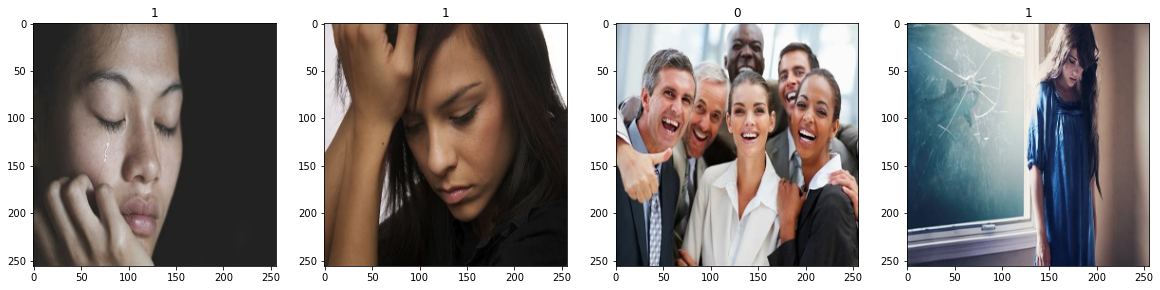

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
#scale data

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
scaled = data.as_numpy_iterator().next()

2023-05-20 20:40:13.305067: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [200]
	 [[{{node Placeholder/_4}}]]
2023-05-20 20:40:13.305430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [200]
	 [[{{node Placeholder/_0}}]]


In [20]:
scaled[0].min()

0.0

In [21]:
# split data

In [22]:
len(data)

7

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [24]:
train_size, val_size, test_size

(4, 2, 1)

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
#build deep learning model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [32]:
#train

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=7, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/7


2023-05-20 20:40:13.754670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [200]
	 [[{{node Placeholder/_4}}]]
2023-05-20 20:40:13.755053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [200]
	 [[{{node Placeholder/_4}}]]


4/4 [==============================] - ETA: 0s - loss: 0.7682 - accuracy: 0.5156

2023-05-20 20:40:19.051787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [200]
	 [[{{node Placeholder/_4}}]]
2023-05-20 20:40:19.052204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [200]
	 [[{{node Placeholder/_4}}]]


4/4 [==============================] - 6s 1s/step - loss: 0.7682 - accuracy: 0.5156 - val_loss: 0.6211 - val_accuracy: 0.5469
Epoch 2/7
4/4 [==============================] - 5s 1s/step - loss: 0.5882 - accuracy: 0.5781 - val_loss: 0.5942 - val_accuracy: 0.7656
Epoch 3/7
4/4 [==============================] - 5s 1s/step - loss: 0.5592 - accuracy: 0.7891 - val_loss: 0.5581 - val_accuracy: 0.7031
Epoch 4/7
4/4 [==============================] - 4s 1s/step - loss: 0.4179 - accuracy: 0.7812 - val_loss: 0.3512 - val_accuracy: 0.8750
Epoch 5/7
4/4 [==============================] - 5s 1s/step - loss: 0.3223 - accuracy: 0.8906 - val_loss: 0.3332 - val_accuracy: 0.8594
Epoch 6/7
4/4 [==============================] - 5s 1s/step - loss: 0.4058 - accuracy: 0.8125 - val_loss: 0.2590 - val_accuracy: 0.9219
Epoch 7/7
4/4 [==============================] - 5s 1s/step - loss: 0.2641 - accuracy: 0.8672 - val_loss: 0.1450 - val_accuracy: 0.9844


In [36]:
#plot performance

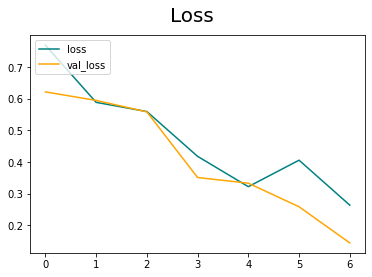

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

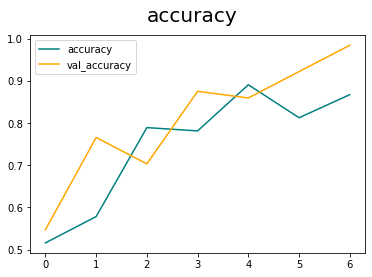

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [39]:
#evaluate performance

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
pre = Precision()

In [42]:
re = Recall()

In [43]:
acc = BinaryAccuracy()

In [44]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-05-20 20:40:48.302304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [200]
	 [[{{node Placeholder/_4}}]]
2023-05-20 20:40:48.303380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [200]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 134ms/step


In [45]:
print(f'{pre.result().numpy()}, {re.result().numpy()}, {acc.result().numpy()}')

1.0, 0.800000011920929, 0.875


In [46]:
#test

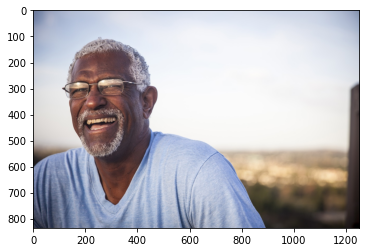

In [57]:
img = cv2.imread('./iStock-happiness-ww.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

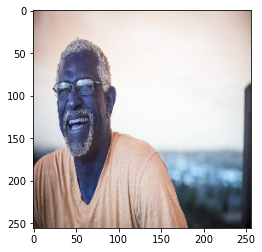

In [58]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
np.expand_dims(resize, 0)

array([[[[152.13281   , 121.13281   , 112.13281   ],
         [153.13281   , 123.13281   , 112.13281   ],
         [155.77982   , 123.779816  , 112.779816  ],
         ...,
         [175.09909   , 148.09909   , 134.09909   ],
         [172.11258   , 144.24539   , 132.84695   ],
         [170.13281   , 141.13281   , 127.13281   ]],

        [[152.39844   , 122.34766   , 111.44922   ],
         [153.90836   , 123.908356  , 112.908356  ],
         [156.29727   , 124.29727   , 111.805084  ],
         ...,
         [178.14453   , 151.14453   , 137.14453   ],
         [174.90836   , 147.90836   , 133.90836   ],
         [170.96945   , 143.96945   , 129.96945   ]],

        [[154.89102   , 123.63034   , 112.63034   ],
         [155.33594   , 123.33594   , 112.33594   ],
         [158.56967   , 125.24155   , 112.24155   ],
         ...,
         [179.66406   , 152.66406   , 138.66406   ],
         [176.5629    , 150.5629    , 134.5629    ],
         [172.94922   , 146.61328   , 132.61328   ]],

In [60]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 27ms/step


In [61]:
yhat

array([[0.30948475]], dtype=float32)

In [62]:
if yhat > 0.5:
    print('sad')
else:
    print('happy')

happy


In [64]:
# save the model

In [65]:
from tensorflow.keras.models import load_model

In [66]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [67]:
#reload the model

In [69]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [70]:
new_model